In [1]:
from pathlib import Path
import pandas as pd

# 1. Point to your repo root
ROOT = Path(r"C:\Users\miga\Documents\GitHub\Project_EDSB")

# 2. Candidate locations for the merged dataset
candidates = [
    ROOT / "data2" / "processed" / "telco_merged_step1.csv",
    ROOT / "data" / "processed" / "telco_merged_step1.csv",
]

print("Checking candidate paths:")
for p in candidates:
    print(" ", p, "-> exists:", p.exists())

# 3. Pick the first one that actually exists
csv_path = None
for p in candidates:
    if p.exists():
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError(
        "Could not find 'telco_merged_step1.csv' in either data2/processed or data/processed."
    )

print("\nUsing CSV path:", csv_path)

# 4. Load the merged file
df = pd.read_csv(csv_path)
print(df.shape)
df.head()



Checking candidate paths:
  C:\Users\miga\Documents\GitHub\Project_EDSB\data2\processed\telco_merged_step1.csv -> exists: False
  C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv -> exists: True

Using CSV path: C:\Users\miga\Documents\GitHub\Project_EDSB\data\processed\telco_merged_step1.csv
(7043, 52)


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,27778,27778
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,California,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,26265,26265


In [2]:
churned = df[df["churn_value"] == 1]

cat_counts = (
    churned["churn_category"]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
)

print(cat_counts)


churn_category
Competitor         0.449973
Attitude           0.168004
Dissatisfaction    0.162119
Price              0.112895
Other              0.107009
Name: proportion, dtype: float64


C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2748712580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


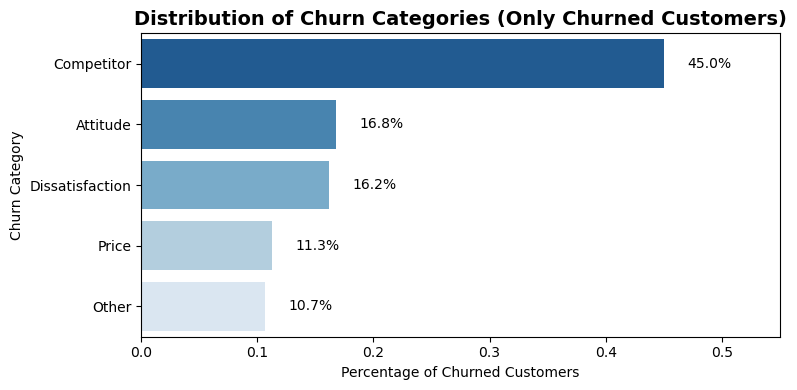

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sns.barplot(
    x=cat_counts.values,
    y=cat_counts.index,
    palette="Blues_r"
)

plt.title("Distribution of Churn Categories (Only Churned Customers)", fontsize=14, weight="bold")
plt.xlabel("Percentage of Churned Customers")
plt.ylabel("Churn Category")

# Add labels with extra spacing to avoid overlap
for i, v in enumerate(cat_counts.values):
    plt.text(
        v + 0.02,           # add more padding to the right (key fix)
        i,
        f"{v:.1%}",
        va="center",
        fontsize=10
    )

plt.xlim(0, max(cat_counts.values) + 0.1)  # extend x-axis so labels never hit the edge
plt.tight_layout()
plt.show()



In [4]:
competitor_df = df[(df["churn_value"] == 1) & (df["churn_category"] == "Competitor")]
competitor_df.head()


,customer_id,count,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,state,...,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population_x,population_y
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,California,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,68701,68701
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,California,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,55668,55668
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,California,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,47534,47534
5,4412-YLTKF,1,Female,72,No,Yes,No,Yes,1,California,...,1,Churned,Yes,1,95,4638,Competitor,Competitor had better devices,63288,63288
11,9947-OTFQU,1,Male,65,No,Yes,No,No,0,California,...,1,Churned,Yes,1,86,4616,Competitor,Competitor had better devices,33817,33817


In [5]:
competitor_df = df[df["churn_category"] == "Competitor"].copy()


In [6]:
reason_pct = (
    competitor_df["churn_reason"]
    .value_counts(normalize=True)
    .head(10)
)
print(reason_pct)


churn_reason
Competitor had better devices                0.372176
Competitor made better offer                 0.369798
Competitor offered more data                 0.139120
Competitor offered higher download speeds    0.118906
Name: proportion, dtype: float64


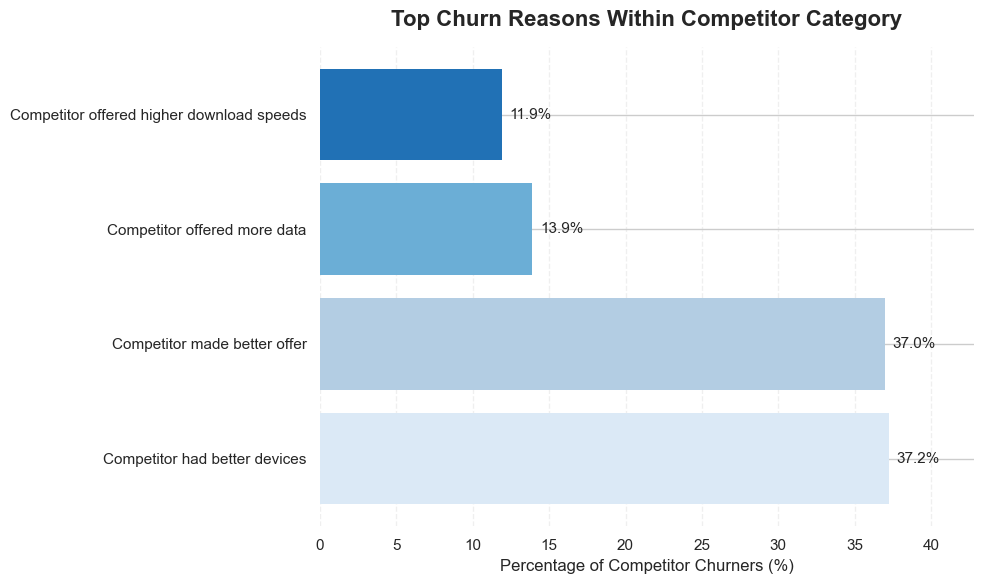

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

# Convert to %
values_pct = reason_pct.values * 100

# Colors (light → dark blue)
colors = ["#dbe9f6", "#b3cde3", "#6baed6", "#2171b5"] * 3
colors = colors[:len(reason_pct)]

bars = ax.barh(
    y=reason_pct.index,
    width=values_pct,
    color=colors,
    edgecolor="none"
)

# Title
ax.set_title(
    "Top Churn Reasons Within Competitor Category",
    fontsize=16, weight="bold", pad=15
)

ax.set_xlabel("Percentage of Competitor Churners (%)", fontsize=12)
ax.set_ylabel("")

# Extend x-axis slightly
ax.set_xlim(0, values_pct.max() * 1.15)

# Add % labels
for bar, pct in zip(bars, values_pct):
    ax.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        ha="left",
        fontsize=11
    )

sns.despine(left=True, bottom=True)
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


## 74% of competitor churn is due to better devices or better offers” directly on the chart. 
## This indicates retention strategy should focus on device financing & pricing competitiveness.
## The company should be better at keeping up with what's on the market in terms of devices quality/preferences and offers 

## *3.3 (from Miguel's Notebook) Who are our Month-to-Month Customers

In [8]:
mtm = df[df["contract"] == "Month-to-Month"]
print(mtm.shape)


(3610, 52)


In [9]:
demo_cols = [
    "gender", "age", "under_30", "senior_citizen", "married",
    "dependents", "number_of_dependents", "state", "city"
]

demo_cols = [col for col in demo_cols if col in df.columns]
demo_cols


['gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'number_of_dependents',
 'state',
 'city']

In [10]:
demo_results = {}

for col in demo_cols:
    if mtm[col].dtype == "object" or mtm[col].dtype == "bool":
        demo_results[col] = (mtm[col].value_counts(normalize=True) * 100).round(1)

demo_results


{'gender': gender
 Male      50.4
 Female    49.6
 Name: proportion, dtype: float64,
 'under_30': under_30
 No     80.1
 Yes    19.9
 Name: proportion, dtype: float64,
 'senior_citizen': senior_citizen
 No     85.0
 Yes    15.0
 Name: proportion, dtype: float64,
 'married': married
 No     64.9
 Yes    35.1
 Name: proportion, dtype: float64,
 'dependents': dependents
 No     83.1
 Yes    16.9
 Name: proportion, dtype: float64,
 'state': state
 California    100.0
 Name: proportion, dtype: float64,
 'city': city
 San Diego          5.5
 Los Angeles        4.3
 San Jose           1.6
 San Francisco      1.4
 Sacramento         1.4
                   ... 
 Sun Valley         0.0
 Lytle Creek        0.0
 Portola Valley     0.0
 Running Springs    0.0
 Niland             0.0
 Name: proportion, Length: 1052, dtype: float64}

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


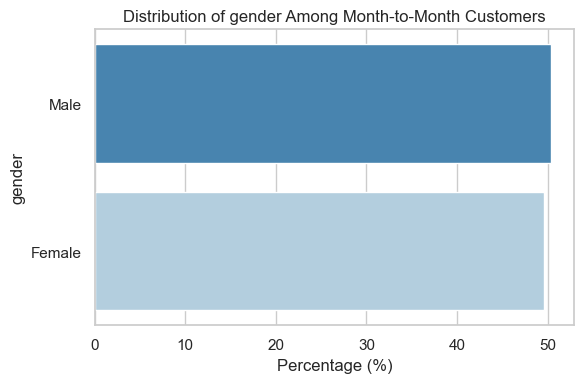

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


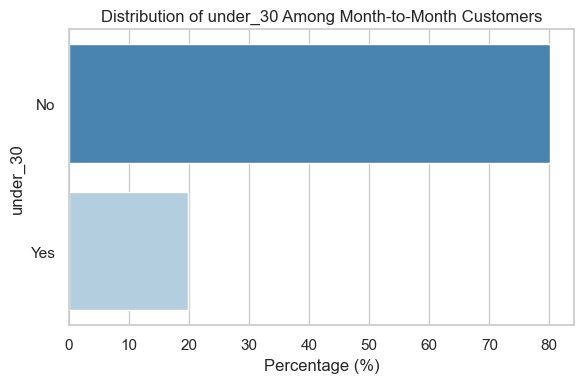

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


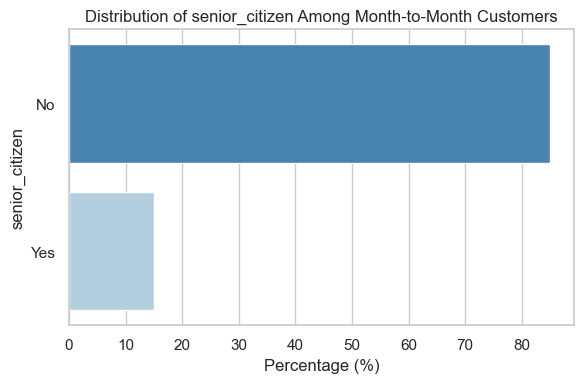

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


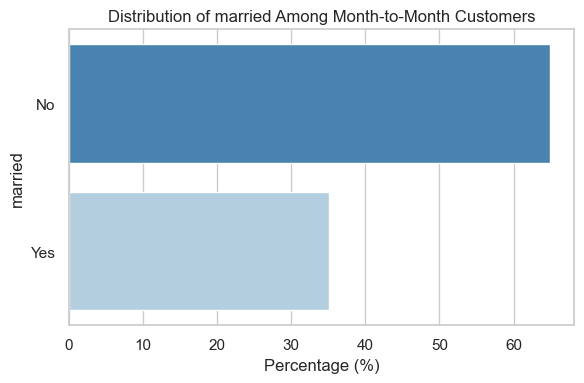

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


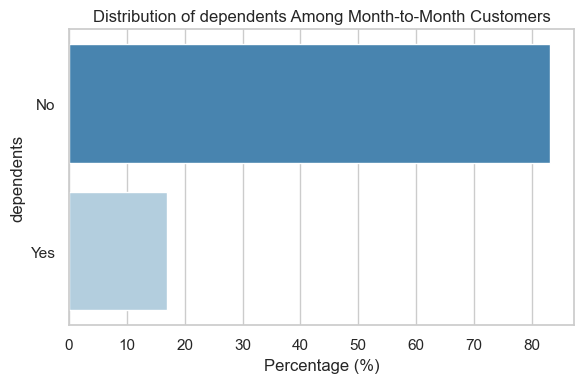

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


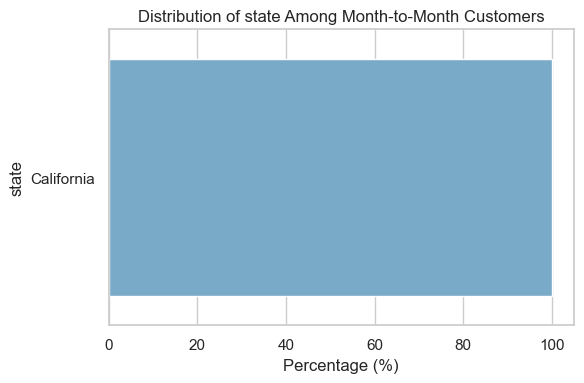

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2833153192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_r")


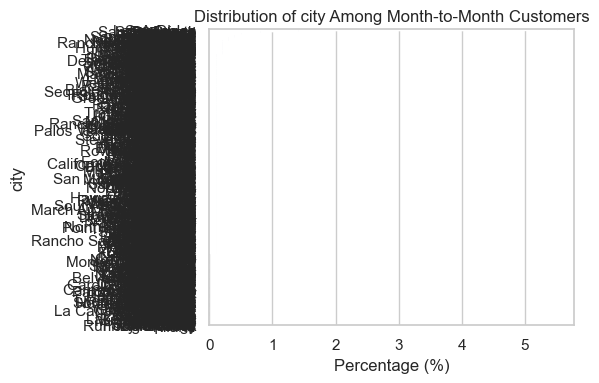

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

for col, series in demo_results.items():
    if col != "age_group":  # we will plot age separately
        plt.figure(figsize=(6,4))
        sns.barplot(x=series.values, y=series.index, palette="Blues_r")
        plt.title(f"Distribution of {col} Among Month-to-Month Customers")
        plt.xlabel("Percentage (%)")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define fixed category orders (global, identical for all charts)
CATEGORY_ORDERS = {
    "gender": ["Male", "Female"],
    "under_30": ["No", "Yes"],
    "senior_citizen": ["No", "Yes"],
    "married": ["No", "Yes"],
    "number_of_dependents": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],  # full range
}

demo_vars = ["gender", "under_30", "senior_citizen", "married", "number_of_dependents"]

def plot_demographics_for_contract(df, contract_key, pretty_name=None):
    if pretty_name is None:
        pretty_name = contract_key

    # Normalize contract names for matching
    contract_norm = df["contract"].astype(str).str.strip().str.lower()
    mask = contract_norm == contract_key.strip().lower()

    df_sub = df[mask].copy()

    print(f"Found {len(df_sub)} customers for contract = {pretty_name}")

    if df_sub.empty:
        print("Unique contract values:", df["contract"].unique())
        return

    # ----------------------------
    # Generate demographic plots
    # ----------------------------
    for col in demo_vars:

        # Force consistent category order
        fixed_order = CATEGORY_ORDERS[col]

        # Compute normalized percentages INCLUDING missing categories
        counts = (
            df_sub[col]
            .value_counts(normalize=True)
            .mul(100)
            .reindex(fixed_order, fill_value=0)  # ensures consistent y-axis
        )

        # Convert numeric labels to strings for clearer display
        y_labels = [str(v) for v in fixed_order]

        plt.figure(figsize=(6, 3))
        sns.barplot(
            x=counts.values,
            y=y_labels,
            palette="Blues_r"
        )

        plt.title(f"Distribution of {col} Among {pretty_name} Customers")
        plt.xlabel("Percentage (%)")
        plt.ylabel(col)
        plt.xlim(0, 100)
        plt.tight_layout()
        plt.show()




Found 3610 customers for contract = Month-to-Month


C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


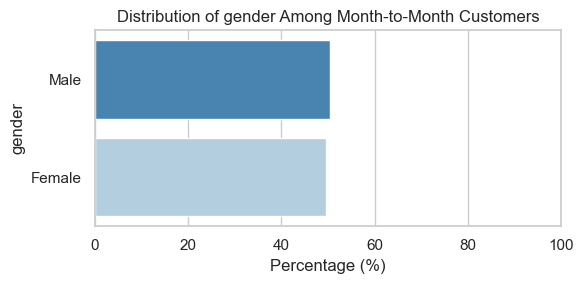

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


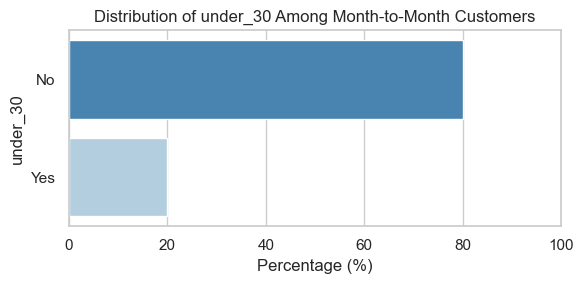

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


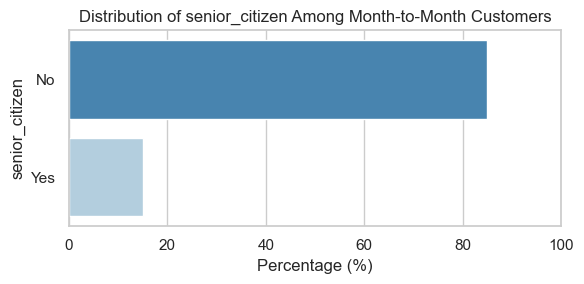

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


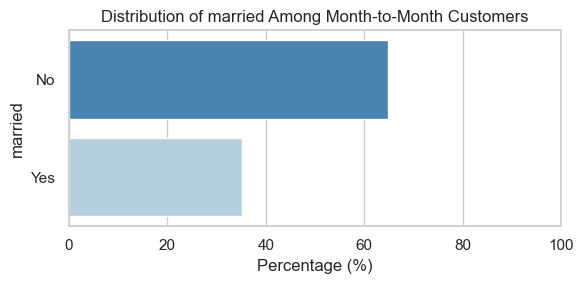

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


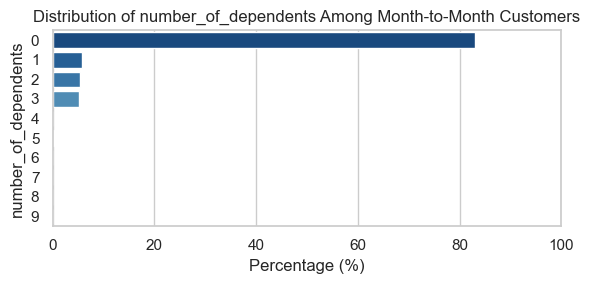

Found 1550 customers for contract = One-Year


C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


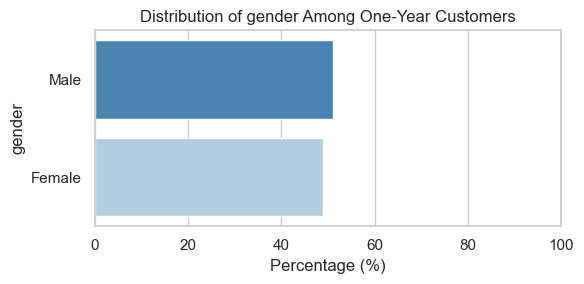

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


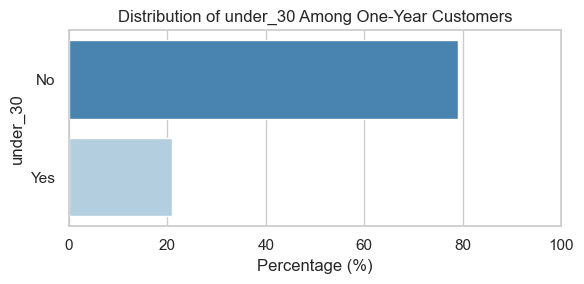

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


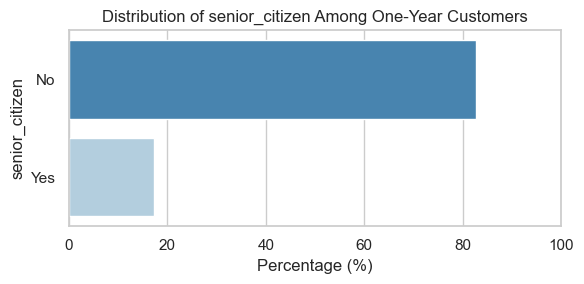

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


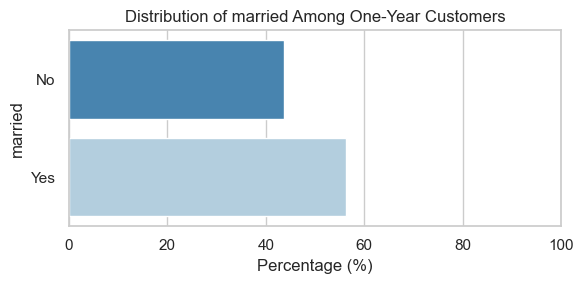

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


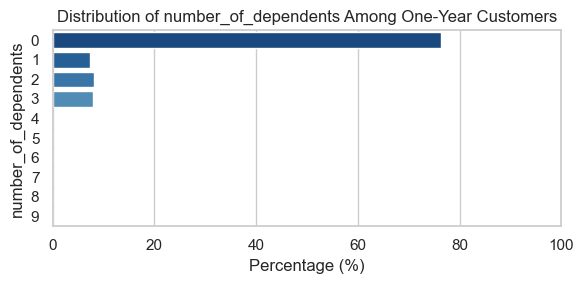

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Found 1883 customers for contract = Two-Year


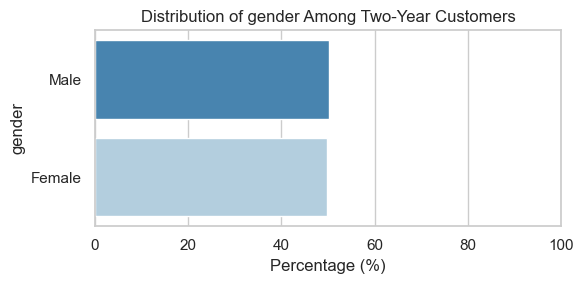

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


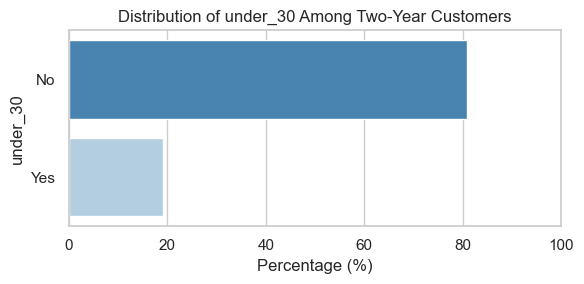

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


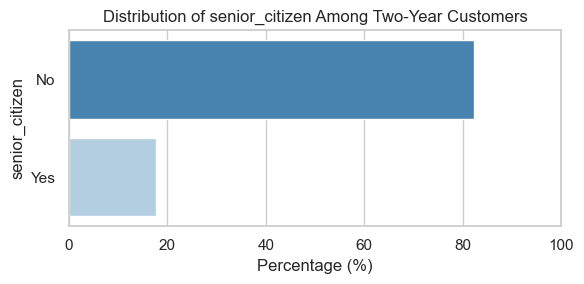

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


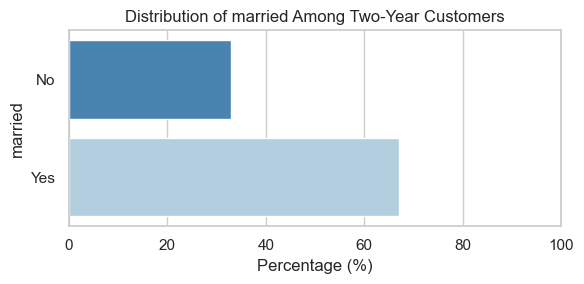

C:\Users\miga\AppData\Local\Temp\ipykernel_26900\2093183611.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


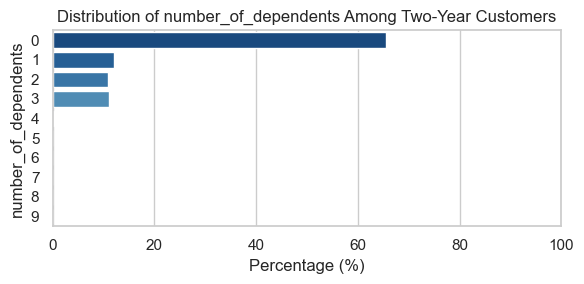

In [19]:
plot_demographics_for_contract(df, "month-to-month", "Month-to-Month")
plot_demographics_for_contract(df, "one year", "One-Year")
plot_demographics_for_contract(df, "two year", "Two-Year")




contract
One Year          65.66
Month-To-Month    65.59
Two Year          62.44
Name: monthly_charge, dtype: float64


C:\Users\miga\AppData\Local\Temp\ipykernel_26900\1996413932.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


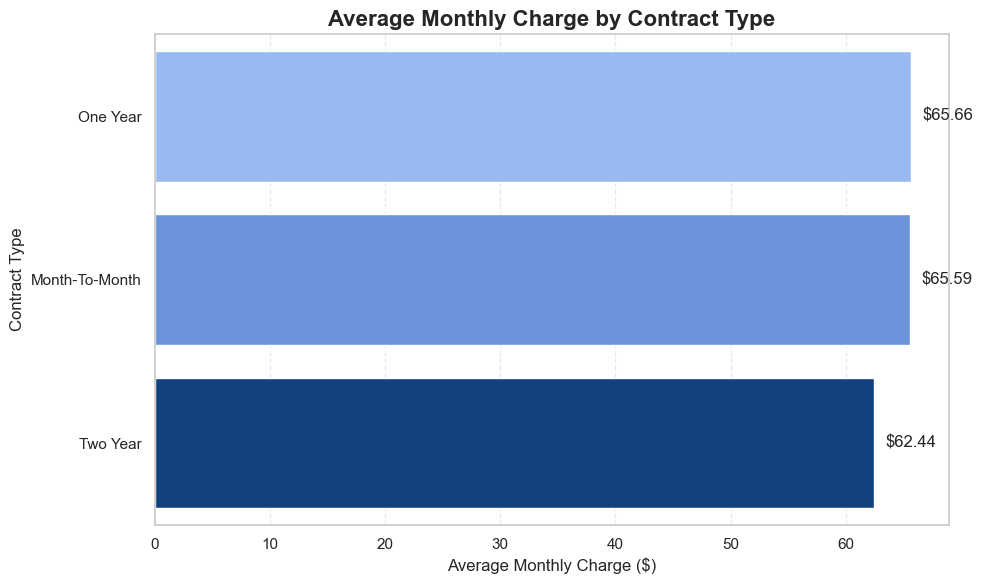

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure contract is clean / consistent formatting
df['contract'] = df['contract'].str.strip().str.title()

# Compute average monthly charge per contract group
avg_monthly_charge = (
    df.groupby('contract')['monthly_charge']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print(avg_monthly_charge)

# ----- Visualization -----

plt.figure(figsize=(10,6))
colors = ["#8ab6ff", "#5a8dee", "#003f8f"]  # light → dark blue

sns.barplot(
    x=avg_monthly_charge.values,
    y=avg_monthly_charge.index,
    palette=colors
)

# Add labels on bars
for i, v in enumerate(avg_monthly_charge.values):
    plt.text(v + 1, i, f"${v:.2f}", va='center', fontsize=12)

plt.title("Average Monthly Charge by Contract Type", fontsize=16, weight='bold')
plt.xlabel("Average Monthly Charge ($)")
plt.ylabel("Contract Type")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


contract
Two Year          4821.64
One Year          4500.57
Month-To-Month    4137.47
Name: cltv, dtype: float64


C:\Users\miga\AppData\Local\Temp\ipykernel_26900\3695435278.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


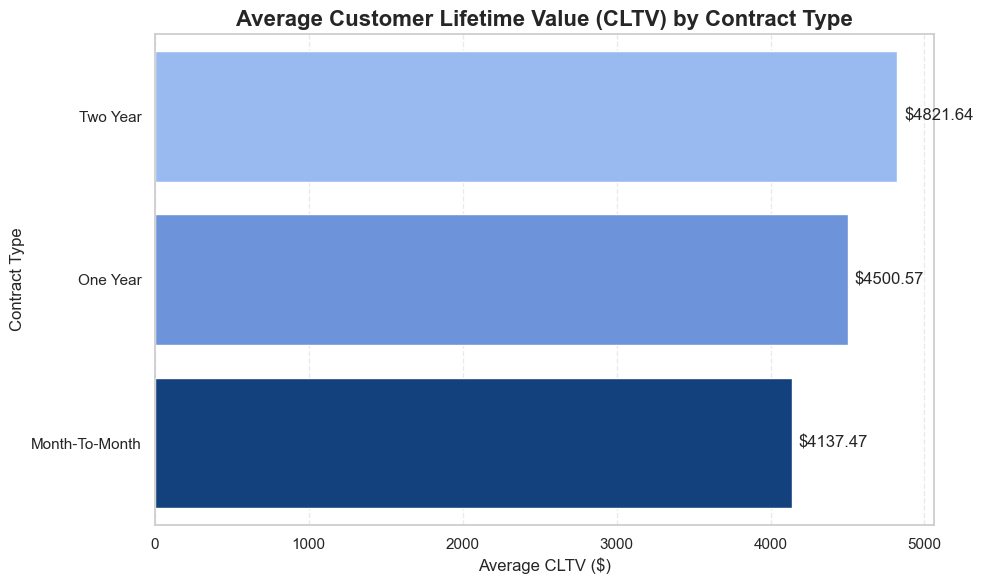

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure contract field is consistent
df["contract"] = df["contract"].str.strip().str.title()

# Compute average CLTV per contract type
avg_cltv = (
    df.groupby("contract")["cltv"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

print(avg_cltv)

# ---- Visualization -----

plt.figure(figsize=(10,6))
colors = ["#8ab6ff", "#5a8dee", "#003f8f"]  # same corporate palette

sns.barplot(
    x=avg_cltv.values,
    y=avg_cltv.index,
    palette=colors
)

# Text labels on bars
for i, v in enumerate(avg_cltv.values):
    plt.text(v + (v*0.01), i, f"${v:.2f}", va='center', fontsize=12)

plt.title("Average Customer Lifetime Value (CLTV) by Contract Type", fontsize=16, weight='bold')
plt.xlabel("Average CLTV ($)")
plt.ylabel("Contract Type")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
